<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##**Tugas *2*: *Classification***

###**Tenggat Waktu: 19 November 2022, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dataset yang digunakan pada tugas ini beserta deskripsinya telah disediakan di SCeLe.
2. Buatlah program Jupyter Notebook yang menjawab pertanyaan sesuai dengan perintah soal yang disediakan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_Tugas2_NPM_Nama.ipynb**. Contoh: A_Tugas2_2006123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **19 November 2022, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Praktikum ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [ ]:
# Isi dengan data diri Anda
NAMA = "Erick Ezrandy"
KELAS = "E"
NPM = "2006595892"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = ['https://stackoverflow.com/questions/45386955/python-replacing-outliers-values-with-median-values', 'https://www.makeuseof.com/fill-missing-data-with-pandas/']

In [ ]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Erick Ezrandy dari kelas E dengan NPM 2006595892, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Erick Ezrandy)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier

## **Dataset**

Dataset yang digunakan adalah dataset Mobile Prices dimana kita memklasifikasi handphone lewat harganya, terdapat 21 atribut dan target atributnya adalah price_range.

Penjelesan atribut:
* battery_power : Total energy a battery can store in one time measured in mAh
* blue : Has bluetooth or not
* clock_speed : speed at which microprocessor executes instructions
* dual_sim : Has dual sim support or not
* fc : Front Camera mega pixels
* four_g : Has 4G or not
* int_memory : Internal Memory in Gigabytes
* m_dep : Mobile Depth in cm
* mobile_wt : Weight of mobile phone
* n_cores : Number of cores of processor
* pc : Primary Camera mega pixels
* px_height : Pixel Resolution Height
* px_width : Pixel Resolution Width
* ram : Random Access Memory in Mega Bytes
* sc_h : Screen Height of mobile in cm
* sc_w : Screen Width of mobile in cm
* talk_time : Longest time that a single battery charge will last when you are
* three_g : Has 3G or not
* touch_screen : Has touch screen or not
* wifi : Has wifi or not
* price_range : This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

Sumber: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification (dengan modifikasi)

## [25] **Preprocessing**

**Pada bagian ini Anda akan diminta untuk melakukan preprocessing dan eksplorasi data sebelum data digunakan dalam model klasifikasi.**

1\. [3] Berikan ringkasan mengenai data tersebut terkait dengan deskripsi setiap atribut, jumlah missing values, jumlah duplikasi data, dan kemungkinan adanya outliers pada data!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2021 entries, 0 to 2020
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2021 non-null   int64  
 1   blue           2021 non-null   int64  
 2   clock_speed    1920 non-null   float64
 3   dual_sim       2021 non-null   int64  
 4   fc             2021 non-null   int64  
 5   four_g         2021 non-null   int64  
 6   int_memory     1915 non-null   float64
 7   m_dep          1928 non-null   float64
 8   mobile_wt      2021 non-null   int64  
 9   n_cores        2021 non-null   int64  
 10  pc             2021 non-null   int64  
 11  px_height      2021 non-null   int64  
 12  px_width       2021 non-null   int64  
 13  ram            1927 non-null   float64
 14  sc_h           2021 non-null   int64  
 15  sc_w           2021 non-null   int64  
 16  talk_time      1937 non-null   float64
 17  three_g        2021 non-null   int64  
 18  touch_sc

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


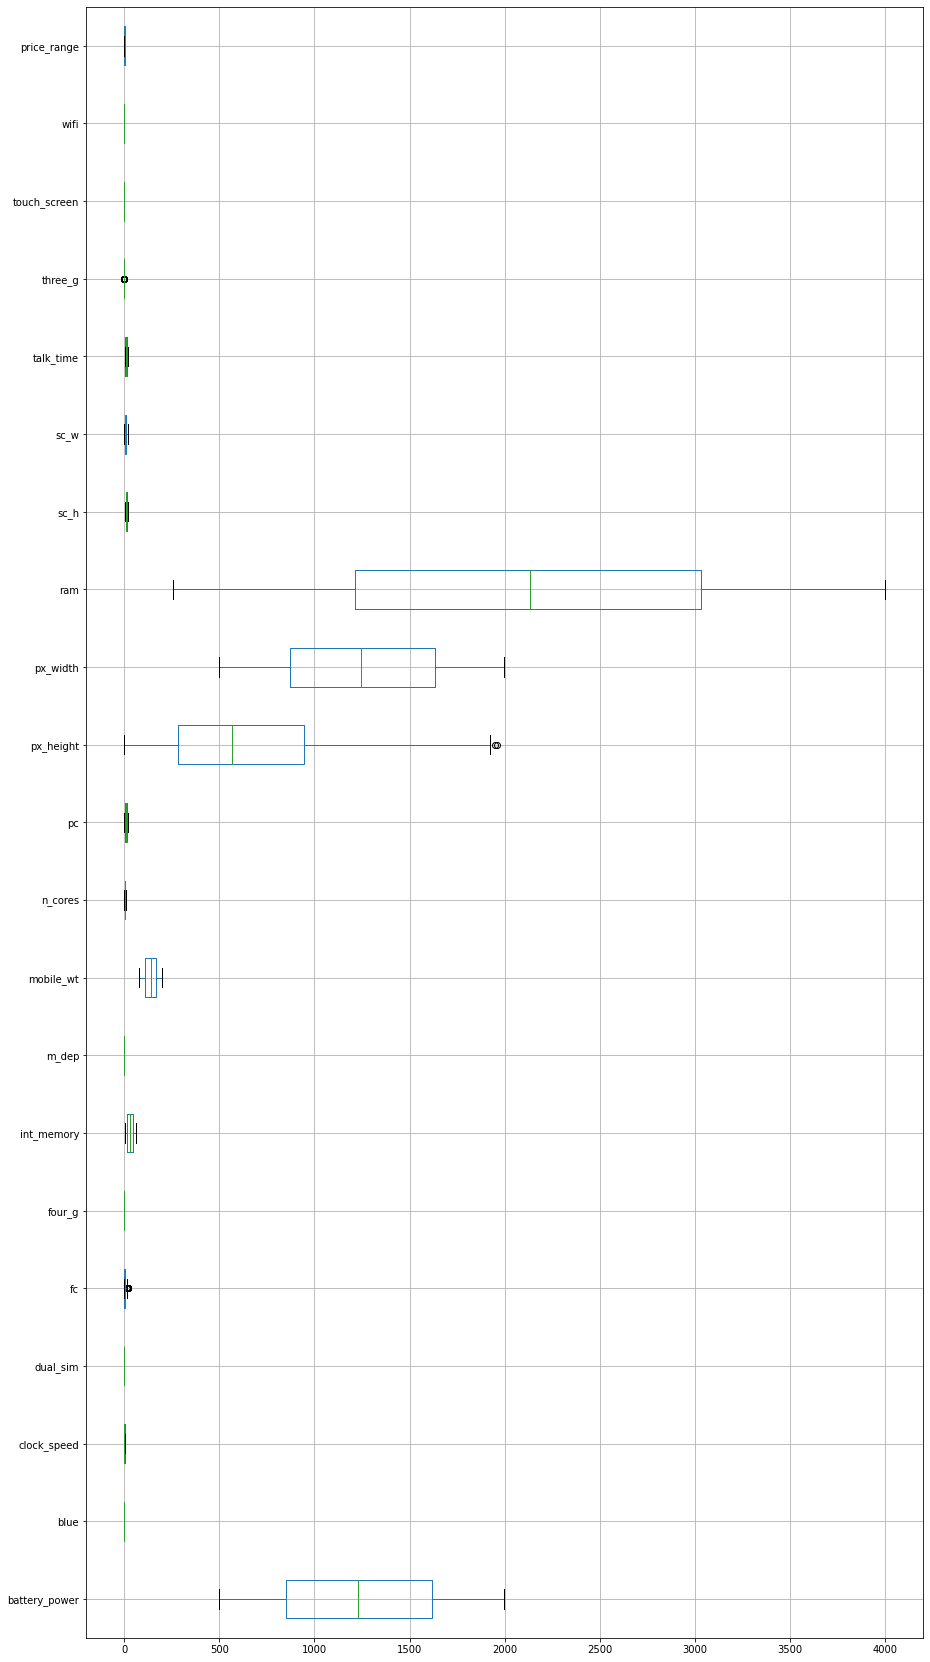

In [ ]:
dataMobile = pd.read_csv("mobile_phone.csv")
print(dataMobile.info())

# mengecek nilai null
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    
    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")
        
    else:
        print(missing_data[missing_data['Total'] > 0])

cek_null(dataMobile)
# jumlah duplikat pada data
print("\n##################################################################\n")
print("Jumlah duplikasi data : " + str(dataMobile.duplicated().sum()))
print("\n##################################################################\n")

def detect_outliers(data, yes=False):
    Q1 = np.quantile(data, .25)
    Q3 = np.quantile(data, .75)
    IQR = Q3 - Q1
    RLB = Q1 - (1.5 * IQR)
    RUB = Q3 + (1.5 * IQR)
    outliers = []
    for i in data:
        if i < RLB or i > RUB:
          if (yes):
            print(i)
          outliers.append(i)
    return outliers

for col in dataMobile:
  if(dataMobile[col].dtypes != object):
    print(f"Outlier pada {col}: {len(detect_outliers(dataMobile[col]))}")
print("\n##################################################################\n")
# mengecek keberadaan outlier
dataMobile.boxplot(vert=False,figsize=(15,30))

2\. [3] Berdasarkan eksplorasi anda pada nomor 1, lakukan data preparation hingga data tersebut menurut anda cukup “clean” dan dapat memberikan hasil klasifikasi yang maksimal.

Jumlah duplikasi data : 0

##################################################################

Tidak ditemukan missing value pada dataset

##################################################################



/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inpla

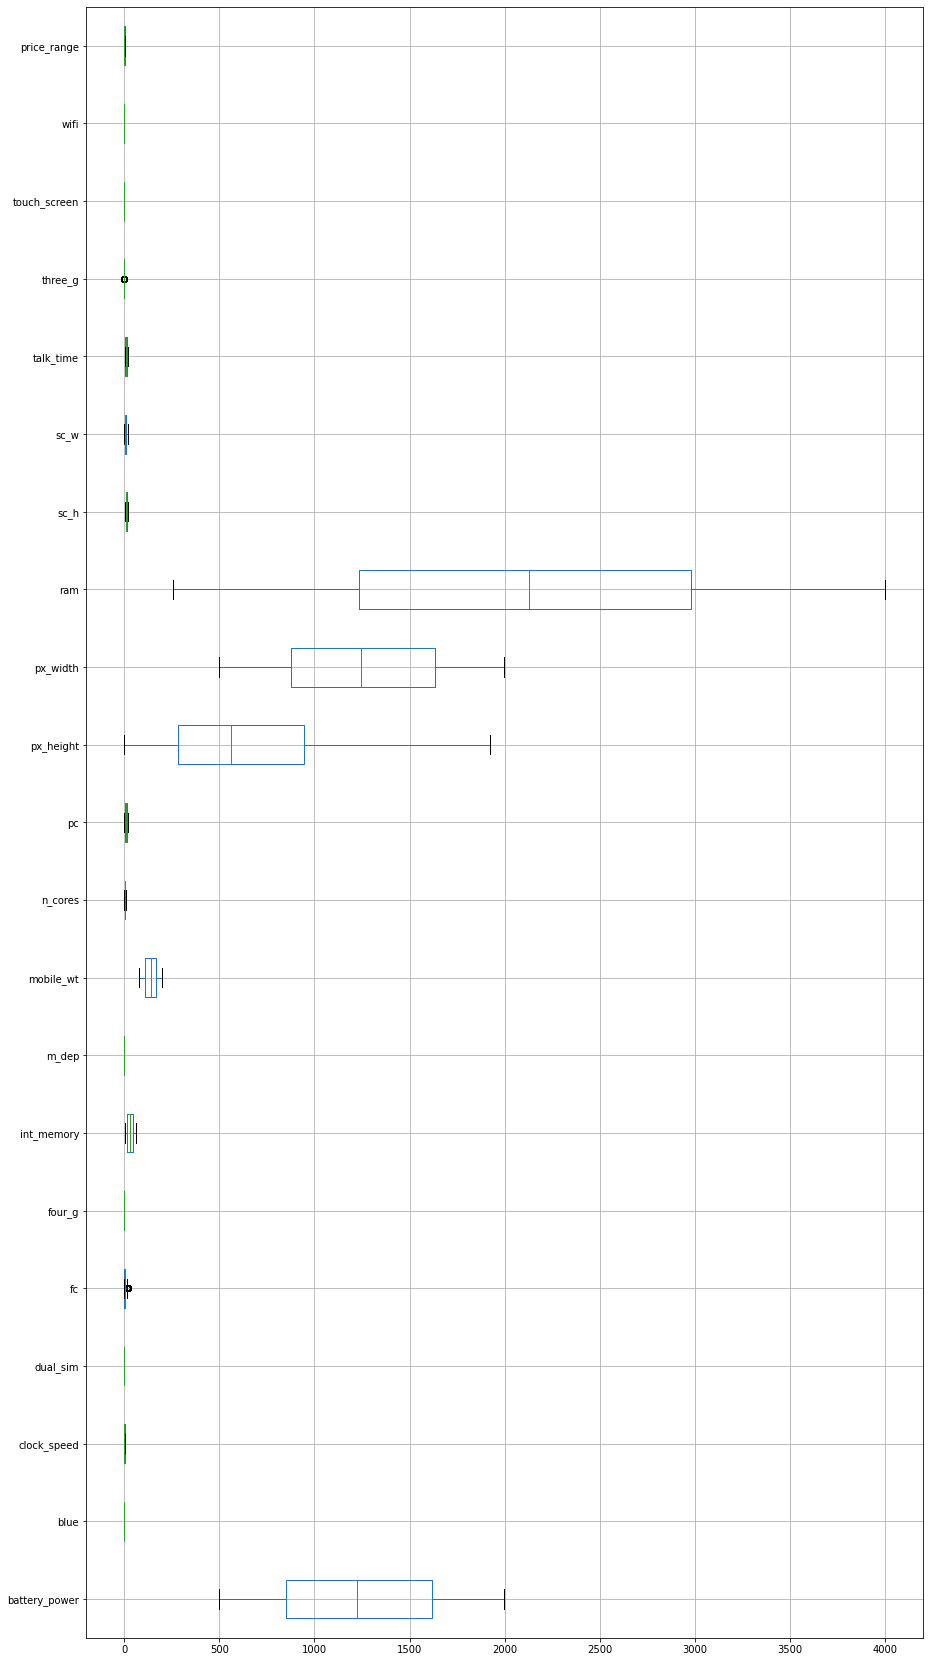

In [ ]:
dataMobile_noDuplicate = dataMobile.drop_duplicates(inplace = False)
print("Jumlah duplikasi data : " + str(dataMobile_noDuplicate.duplicated().sum()))

# handle missing values
for col in dataMobile_noDuplicate[['talk_time', 'm_dep', 'ram', 'touch_screen', 'wifi','clock_speed','int_memory']]:
  if (col == 'touch_screen' or col == 'wifi'):
    dataMobile_noDuplicate[col].fillna(dataMobile_noDuplicate[col].mode()[0], inplace=True)
  else:
    dataMobile_noDuplicate[col].fillna(dataMobile_noDuplicate[col].median(), inplace=True)

print("\n##################################################################\n")
cek_null(dataMobile_noDuplicate)
print("\n##################################################################\n")

def change_outlier_to_median(data, listColOutliers):
  for col in listColOutliers:
    Q1 = np.percentile(dataMobile_noDuplicate[col], 25, interpolation = 'midpoint')
    Q3 = np.percentile(dataMobile_noDuplicate[col], 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    RUB = Q3 + (1.5*IQR)
    RLB = Q1 - (1.5*IQR)

    dataMobile_noDuplicate[col] = np.where(dataMobile_noDuplicate[col] > RUB, dataMobile_noDuplicate[col].median(), dataMobile_noDuplicate[col])
    dataMobile_noDuplicate[col] = np.where(dataMobile_noDuplicate[col] < RLB, dataMobile_noDuplicate[col].median(), dataMobile_noDuplicate[col])
 
change_outlier_to_median(dataMobile_noDuplicate, ['px_height'])

dataMobile_noDuplicate.boxplot(vert=False,figsize=(15,30))

3\. [3] Menurut Anda, apakah perlu dilakukan normalisasi terhadap data, atau cukup menggunakan data asli? Jika ya, bentuk normalisasi apa yang tepat digunakan pada data? Jelaskan secara singkat alasan Anda!


> Perlu karena ada kolom yang nilainya sampai ribuan dan ada juga kolom yang nilainya hanya puluhan. Hal tersebut jika tidak dinormalisasikan, data dengan nilai yang besar akan sangat dominan terhadap data yang nilainya kecil sehingga model yang dibangun menjadi tidak bagus. Saya memilih standard scaler atau z-score → mengubah mean = 0 , std = 1

4\. [10] Sebelum data diproses lebih lanjut lakukan *feature selection* dengan memilih beberapa fitur yang paling optimal untuk mengklasifikasikan label target!

Jumlah feature (sebelum dilakukan feature selection ) : 20
Jumlah feature (setelah dilakukan feature selection ) : 3
['battery_power' 'px_width' 'ram']


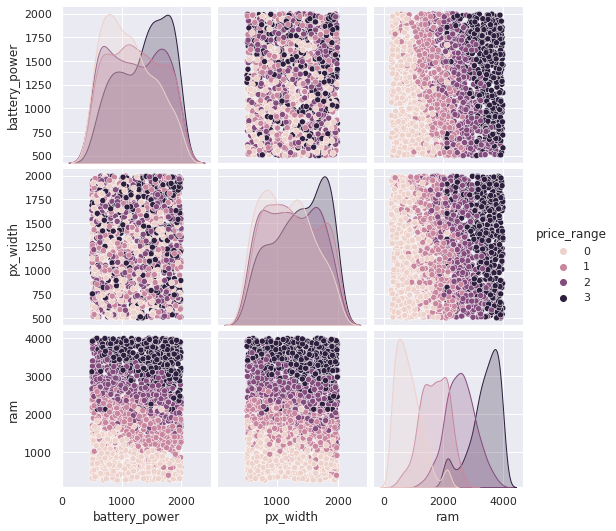

In [ ]:
import seaborn as sns
sns.set()

# Variabel independen
X_raw = dataMobile_noDuplicate.drop(["price_range"], axis=1)
# Variable dependen
y_price_range = dataMobile_noDuplicate["price_range"]

# print(pd.concat([y_price_range, X_raw[['ram', 'battery_power','px_width']]], axis=1).corr())

# feature selection
selector = SelectKBest(f_classif, k=3)
X_dataMobile_noDuplicate = selector.fit_transform(X_raw, y_price_range)

print(f"Jumlah feature (sebelum dilakukan feature selection ) : {X_raw.shape[1]}")
print(f"Jumlah feature (setelah dilakukan feature selection ) : {X_dataMobile_noDuplicate.shape[1]}")

input_features = selector.feature_names_in_
best_selector = selector.get_feature_names_out(input_features=input_features)
print(best_selector)

new_data = pd.concat([y_price_range, X_raw[best_selector]], axis=1)
sns.pairplot(new_data, hue='price_range')

5\. [6] Apa saja fitur-fitur yang terpilih hasil dari *feature selection*? Jelaskan strategi Anda dalam memilih fitur-fitur tersebut dan berikan analisis mengapa fitur tersebut cocok digunakan untuk mengklasifikasi label target!

> Fitur-fitur yang terpilih hasil dari *feature selection* adalah RAM battery_power, dan px_width. Saya menggunakan teknik ANOVA dan juga mengecek korelasi tiap fitur-fitur yang ada di dataset tersebut dan didapatkan bahwa fitur RAM, battery_power, dan px_width memiliki korelasi cukup tinggi di antara fitur-fitur yang lain. Berikut adalah nilai korelasinya:

>                    price_range    ram       battery_power   px_width
    price_range       1.000000    0.893342     0.200723       0.165818
    ram               0.893342    1.000000     0.004143       0.005585
    battery_power     0.200723    0.004143     1.000000      -0.008402
    px_width          0.165818    0.005585    -0.008402       1.000000

## [75] **Classification**

**Pada bagian ini Anda akan diminta untuk melakukan klasifikasi harga suatu mobile phone berdasarkan fitur-fitur yang sudah Anda pilih sebelumnya. Anda akan mencoba berbagai macam model klasifikasi seperti Decision Tree, Random Forest, Naive Bayes, dan K-nearest Neighbors untuk mencari model yang memiliki performa terbaik.**

### [3] Preparation

6\. [3] Buatlah model K-Fold Cross Validation yang akan digunakan untuk membagi dataset train dan test menjadi beberapa bagian (*fold*). Strategi ini akan Anda gunakan pada semua *classifier* dibandingkan dengan strategi sebelumnya yang hanya membagi data ke dalam data training dan testing menggunakan method `train_test_split`.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score, make_scorer

kf5 = KFold(n_splits=5) 

def evaluate_classifier_performance(prediction, y_test):
    summary = []
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print("\nConfusion Matrix\n")
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)

    f1_score_macro = f1_score(y_test, prediction, average="macro")
    f1_score_micro = f1_score(y_test, prediction, average="micro")
    precision_score_macro = precision_score(y_test, prediction, average="macro", zero_division=0)
    precision_score_micro = precision_score(y_test, prediction, average="micro", zero_division=0)
    recall_score_macro = recall_score(y_test, prediction, average="macro", zero_division=0)
    recall_score_micro = recall_score(y_test, prediction, average="micro", zero_division=0)
    print("\n\nButuh informasi lebih lengkap? silakan simak di bawah ini : ")
    print(f'F1 Macro Average: {f1_score_macro}')
    print(f'F1 Micro Average: {f1_score_micro}')
    print(f'Precision Macro Average: {precision_score_macro}')
    print(f'Precision Micro Average: {precision_score_micro}')
    print(f'Recall Macro Average: {recall_score_macro}')
    print(f'Recall Micro Average: {recall_score_micro}\n')

    return [f1_score_macro, f1_score_micro, precision_score_macro, precision_score_micro, recall_score_macro, recall_score_micro]

def scaling_model(model, X_train, X_test, y_train, scaled=False):
  if(scaled):
    # standarisasi
    scaler = StandardScaler()

    X_train_scaled = scaler.fit_transform(X_train) # training
    X_test_scaled = scaler.transform(X_test) # testing

    model.fit(X_train_scaled, y_train)
    prediction = model.predict(X_test_scaled)
    return prediction

  else:
    model.fit(X_train,y_train)

    prediction = model.predict(X_test)
    return prediction

def eval_model(model, scaled=False):
  iteration = 1
  data = X_raw[best_selector].to_numpy()
  acc_score = []
  f1_score_macro = 0
  f1_score_micro = 0
  precision_score_macro = 0
  precision_score_micro = 0
  recall_score_macro = 0
  recall_score_micro = 0 
 
  for train_index, test_index in kf5.split(data):
      print("##################################################################\n")
      print(f"Evaluation Model untuk fold ke-{iteration}")
      print("\n##################################################################\n")
      X_train, X_test = data[train_index], data[test_index]
      y_train, y_test = y_price_range.iloc[train_index], y_price_range.iloc[test_index]

      
      prediction = scaling_model(model, X_train, X_test, y_train, scaled)
      
      res = evaluate_classifier_performance(prediction, y_test)
      acc = accuracy_score(prediction , y_test)
      acc_score.append(acc)
      f1_score_macro += res[0]
      f1_score_micro += res[1]
      precision_score_macro += res[2]
      precision_score_micro += res[3]
      recall_score_macro += res[4]
      recall_score_micro += res[5]
      iteration += 1
      
  avg_acc_score = sum(acc_score)/5
  avg_f1_score_macro_score = f1_score_macro / 5
  avg_f1_score_micro_score = f1_score_micro / 5
  avg_precision_score_macro_score = precision_score_macro / 5
  avg_precision_score_micro_score = precision_score_micro / 5
  avg_recall_score_macro_score = recall_score_macro / 5
  avg_recall_score_micro_score = recall_score_micro / 5
  
  
  print("\n##################################################################\n")
  print("SUMMARY")
  print(f'Avg accuracy : {avg_acc_score}')
  print(f'Avg F1 Macro : {avg_f1_score_macro_score}')
  print(f'Avg F1 Micro : {avg_f1_score_micro_score}')
  print(f'Avg precision Macro : {avg_precision_score_macro_score}')
  print(f'Avg precision Micro : {avg_precision_score_micro_score}')
  print(f'Avg recall Macro : {avg_recall_score_macro_score}')
  print(f'Avg recall Micro : {avg_recall_score_micro_score}')
  print("\n##################################################################\n")  


### [19] Decision Tree

7\. [4] Implementasikan model Decision Tree tanpa konfigurasi parameter apapun, serta berikan hasil evaluasinya!

In [ ]:
tree_model_1 = DecisionTreeClassifier()
eval_model(tree_model_1)

##################################################################

Evaluation Model untuk fold ke-1

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        89
           1       0.80      0.73      0.77        98
           2       0.71      0.82      0.76        99
           3       0.88      0.80      0.84       114

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           84   3   1   1
1            7  72  16   3
2            0  10  81   8
3            2   5  16  91



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8220768568966197
F1 Micro Average: 0.82
Precision Macro Average: 0.8243118169680386
Precision Micro Average: 0.82
Recall Macro Average: 0.8237353836217569
Recall Micro Average: 0.82

##################################################################

Evaluation Model untuk fold ke-2

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.87      0.80      0.84       101
           1       0.73      0.79      0.76        91
           2       0.84      0.77      0.80       105
           3       0.83      0.90      0.87       103

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           81  17   1   2
1           10  72   7   2
2            1   8  81  15
3            1   1   8  93



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8160131963465211
F1 Micro Average: 0.8175
Precision Macro Average: 0.81776757718385
Precision Micro Average: 0.8175
Recall Macro Average: 0.816882545504097
Recall Micro Average: 0.8175

##################################################################

Evaluation Model untuk fold ke-3

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       105
           1       0.76      0.79      0.77        94
           2       0.76      0.77      0.76       103
           3       0.86      0.80      0.83        98

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.82      0.81      0.82       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           95   6   1   3
1           12  74   7   1
2            1  14  79   9
3            0   3  17  78



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8138924347104455
F1 Micro Average: 0.815
Precision Macro Average: 0.814818617331504
Precision Micro Average: 0.815
Recall Macro Average: 0.8137261514810428
Recall Micro Average: 0.815

##################################################################

Evaluation Model untuk fold ke-4

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       101
           1       0.79      0.72      0.75       115
           2       0.79      0.76      0.77        98
           3       0.83      0.83      0.83        86

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.79       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           90  10   0   1
1           24  83   6   2
2            1  11  74  12
3            0   1  14  71



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.7960733791402396
F1 Micro Average: 0.795
Precision Macro Average: 0.7964750810075983
Precision Micro Average: 0.795
Recall Macro Average: 0.7983779188777095
Recall Micro Average: 0.795

##################################################################

Evaluation Model untuk fold ke-5

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       104
           1       0.80      0.76      0.78       102
           2       0.75      0.75      0.75        95
           3       0.81      0.86      0.83        99

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           89  11   2   2
1           12  78  10   2
2            0   8  71  16
3            1   1  12  85



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8061948560722194
F1 Micro Average: 0.8075
Precision Macro Average: 0.8063399043828057
Precision Micro Average: 0.8075
Recall Macro Average: 0.8066073481901656
Recall Micro Average: 0.8075


##################################################################

SUMMARY
Avg accuracy : 0.8109999999999999
Avg F1 Macro : 0.810850144633209
Avg F1 Micro : 0.8109999999999999
Avg precision Macro : 0.8119425993747594
Avg precision Micro : 0.8109999999999999
Avg recall Macro : 0.8118658695349543
Avg recall Micro : 0.8109999999999999

##################################################################



8\. [4] Implementasikan model Decision Tree dengan memberikan parameter nilai `min_samples_leaf=50`; serta berikan hasil evaluasinya!

In [ ]:
tree_model_2 = DecisionTreeClassifier(min_samples_leaf=50)
eval_model(tree_model_2)

##################################################################

Evaluation Model untuk fold ke-1

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        89
           1       0.81      0.72      0.76        98
           2       0.62      0.82      0.70        99
           3       0.93      0.70      0.80       114

    accuracy                           0.79       400
   macro avg       0.81      0.80      0.80       400
weighted avg       0.81      0.79      0.79       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           85   3   1   0
1           10  71  17   0
2            0  12  81   6
3            0   2  32  80



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.7979254324450678
F1 Micro Average: 0.7925
Precision Macro Average: 0.8125270481875007
Precision Micro Average: 0.7925
Recall Macro Average: 0.7998705449600947
Recall Micro Average: 0.7925

##################################################################

Evaluation Model untuk fold ke-2

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       101
           1       0.69      0.64      0.66        91
           2       0.65      0.65      0.65       105
           3       0.73      0.80      0.76       103

    accuracy                           0.73       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.73      0.73      0.73       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           86   9   0   6
1           14  58  15   4
2            0  17  68  20
3            0   0  21  82



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.7330217342289174
F1 Micro Average: 0.735
Precision Macro Average: 0.7341163003663004
Precision Micro Average: 0.735
Recall Macro Average: 0.7331458345877263
Recall Micro Average: 0.735

##################################################################

Evaluation Model untuk fold ke-3

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       105
           1       0.69      0.72      0.70        94
           2       0.64      0.71      0.67       103
           3       0.87      0.70      0.78        98

    accuracy                           0.77       400
   macro avg       0.77      0.76      0.76       400
weighted avg       0.77      0.77      0.77       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           96   8   1   0
1           12  68  14   0
2            0  20  73  10
3            0   3  26  69



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.7646359349991112
F1 Micro Average: 0.765
Precision Macro Average: 0.7723815436173864
Precision Micro Average: 0.765
Recall Macro Average: 0.7626273665838985
Recall Micro Average: 0.765

##################################################################

Evaluation Model untuk fold ke-4

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       101
           1       0.76      0.68      0.72       115
           2       0.68      0.66      0.67        98
           3       0.80      0.81      0.81        86

    accuracy                           0.77       400
   macro avg       0.76      0.77      0.77       400
weighted avg       0.76      0.77      0.76       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           93   7   1   0
1           21  78  16   0
2            0  16  65  17
3            0   2  14  70



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.7650160642604493
F1 Micro Average: 0.765
Precision Macro Average: 0.7636880153912569
Precision Micro Average: 0.765
Recall Macro Average: 0.76906793581692
Recall Micro Average: 0.765

##################################################################

Evaluation Model untuk fold ke-5

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.91      0.83      0.86       104
           1       0.73      0.75      0.74       102
           2       0.64      0.66      0.65        95
           3       0.81      0.83      0.82        99

    accuracy                           0.77       400
   macro avg       0.77      0.77      0.77       400
weighted avg       0.77      0.77      0.77       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           86  14   4   0
1            9  77  16   0
2            0  13  63  19
3            0   2  15  82



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.7693889910893648
F1 Micro Average: 0.7699999999999999
Precision Macro Average: 0.7716041458025786
Precision Micro Average: 0.77
Recall Macro Average: 0.7683164401817653
Recall Micro Average: 0.77


##################################################################

SUMMARY
Avg accuracy : 0.7655000000000001
Avg F1 Macro : 0.7659976314045821
Avg F1 Micro : 0.7655000000000001
Avg precision Macro : 0.7708634106730046
Avg precision Micro : 0.7655000000000001
Avg recall Macro : 0.766605624426081
Avg recall Micro : 0.7655000000000001

##################################################################



9\. [6] Bandingkan model yang dibuat pada soal nomor 7 dan nomor 8, manakah yang lebih baik? Berikan analisis Anda terkait bagaimana hubungan perubahan parameter tersebut dengan kualitas hasil klasifikasi!

> Model nomor 7 memiliki performa yang lebih baik. Hal tersebut bisa dilihat dari hasil summarynya bahwa rata-rata F1 Macro, F1 Micro, Precision Macro, Precision Micro, Recall Macro, dan Recall Micronya lebih tinggi jika dibandingkan dengan model nomor 8. Model nomor 8 memiliki hasil evaluasi yang lebih rendah karena mungkin parameter yang diberikan tidaklah cocok sehingga model tersebut menjadi kurang bagus.

10\. [5] Buatlah model yang memiliki performa yang lebih bagus dibanding kedua model sebelumnya! Anda dibebaskan untuk melakukan eksplorasi dalam mengkonfigurasi parameter yang dipakai.

In [ ]:
tree_model_3 = DecisionTreeClassifier()

def get_hp_model(model):
  data = X_raw[best_selector].to_numpy()
  best_params = []
  param_grid = {'min_samples_split': [i for i in range(3,11)],
                'min_samples_leaf': [i for i in range(2,11)],
                'max_depth' : [i for i in range(5,9)]}
 
  for train_index, test_index in kf5.split(data):
      X_train, X_test = data[train_index], data[test_index]
      y_train, y_test = y_price_range.iloc[train_index], y_price_range.iloc[test_index]
      model.fit(X_train,y_train)
      prediction = model.predict(X_test)

      clf = GridSearchCV(estimator= model, param_grid=param_grid, cv=5)
      clf.fit(X_train, y_train)
      best_params.append(clf.best_params_)
  
  return best_params

res = get_hp_model(tree_model_3)
print(res)

[{'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 5}, {'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 8}, {'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 5}, {'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 6}, {'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 3}]


In [ ]:
for hp in res:
  tree_model_4 = DecisionTreeClassifier(**hp)
  eval_model(tree_model_4)

##################################################################

Evaluation Model untuk fold ke-1

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.93      0.94      0.94        89
           1       0.85      0.79      0.81        98
           2       0.68      0.80      0.73        99
           3       0.86      0.77      0.81       114

    accuracy                           0.82       400
   macro avg       0.83      0.82      0.82       400
weighted avg       0.83      0.82      0.82       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           84   3   1   1
1            6  77  12   3
2            0  10  79  10
3            0   1  25  88



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8249146492861577
F1 Micro Average: 0.82
Precision Macro Average: 0.8293614881850176
Precision Micro Average: 0.82
Recall Macro Average: 0.824861033243647
Recall Micro Average: 0.82

##################################################################

Evaluation Model untuk fold ke-2

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.94      0.81      0.87       101
           1       0.70      0.86      0.77        91
           2       0.83      0.70      0.76       105
           3       0.80      0.88      0.84       103

    accuracy                           0.81       400
   macro avg       0.82      0.81      0.81       400
weighted avg       0.82      0.81      0.81       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           82  17   0   2
1            5  78   5   3
2            0  14  73  18
3            0   2  10  91



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8099510036529665
F1 Micro Average: 0.81
Precision Macro Average: 0.8182556267288572
Precision Micro Average: 0.81
Recall Macro Average: 0.811939321532708
Recall Micro Average: 0.81

##################################################################

Evaluation Model untuk fold ke-3

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       105
           1       0.73      0.84      0.78        94
           2       0.79      0.74      0.76       103
           3       0.86      0.86      0.86        98

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.84      0.83      0.83       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           94   9   0   2
1            4  79   9   2
2            0  17  76  10
3            0   3  11  84



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8323121362065656
F1 Micro Average: 0.8325
Precision Macro Average: 0.8348686696900982
Precision Micro Average: 0.8325
Recall Macro Average: 0.8326676404914373
Recall Micro Average: 0.8325

##################################################################

Evaluation Model untuk fold ke-4

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       101
           1       0.84      0.75      0.79       115
           2       0.85      0.76      0.80        98
           3       0.80      0.87      0.83        86

    accuracy                           0.82       400
   macro avg       0.83      0.83      0.82       400
weighted avg       0.83      0.82      0.82       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           95   5   0   1
1           21  86   3   5
2            0  11  74  13
3            1   0  10  75



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8243799236178638
F1 Micro Average: 0.825
Precision Macro Average: 0.8258875299842456
Precision Micro Average: 0.825
Recall Macro Average: 0.8289038026086506
Recall Micro Average: 0.825

##################################################################

Evaluation Model untuk fold ke-5

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       104
           1       0.72      0.80      0.76       102
           2       0.74      0.67      0.71        95
           3       0.84      0.82      0.83        99

    accuracy                           0.80       400
   macro avg       0.80      0.79      0.79       400
weighted avg       0.80      0.80      0.79       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           91  12   1   0
1           12  82   8   0
2            0  16  64  15
3            1   4  13  81



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.7930527026176197
F1 Micro Average: 0.795
Precision Macro Average: 0.7955585730314157
Precision Micro Average: 0.795
Recall Macro Average: 0.7926968993338963
Recall Micro Average: 0.795


##################################################################

SUMMARY
Avg accuracy : 0.8164999999999999
Avg F1 Macro : 0.8169220830762347
Avg F1 Micro : 0.8164999999999999
Avg precision Macro : 0.8207863775239268
Avg precision Micro : 0.8164999999999999
Avg recall Macro : 0.8182137394420679
Avg recall Micro : 0.8164999999999999

##################################################################

##################################################################

Evaluation Model untuk fold ke-1

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      

prediction   0   1   2   3
actual                    
0           84   4   1   0
1            7  75  16   0
2            0  12  81   6
3            0   2  20  92



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8332854886432974
F1 Micro Average: 0.83
Precision Macro Average: 0.8386861810375831
Precision Micro Average: 0.83
Recall Macro Average: 0.8335814273023869
Recall Micro Average: 0.83

##################################################################

Evaluation Model untuk fold ke-2

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.94      0.80      0.87       101
           1       0.75      0.85      0.80        91
           2       0.85      0.73      0.79       105
           3       0.78      0.91      0.84       103

    accuracy                           0.82       400
   macro avg       0.83      0.82      0.82       400
weighted avg       0.83      0.82      0.82       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           81  15   0   5
1            5  77   5   4
2            0  10  77  18
3            0   0   9  94



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.822309405391926
F1 Micro Average: 0.8225
Precision Macro Average: 0.8299439440466676
Precision Micro Average: 0.8225
Recall Macro Average: 0.8235221841825706
Recall Micro Average: 0.8225

##################################################################

Evaluation Model untuk fold ke-3

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       105
           1       0.74      0.83      0.78        94
           2       0.70      0.82      0.75       103
           3       0.95      0.72      0.82        98

    accuracy                           0.82       400
   macro avg       0.83      0.82      0.82       400
weighted avg       0.83      0.82      0.82       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           94  10   1   0
1            5  78  11   0
2            0  15  84   4
3            0   3  24  71



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8189352761763613
F1 Micro Average: 0.8175
Precision Macro Average: 0.8330026681913475
Precision Micro Average: 0.8175
Recall Macro Average: 0.8162622764453851
Recall Micro Average: 0.8175

##################################################################

Evaluation Model untuk fold ke-4

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       101
           1       0.84      0.66      0.74       115
           2       0.79      0.77      0.78        98
           3       0.76      0.87      0.81        86

    accuracy                           0.80       400
   macro avg       0.80      0.81      0.80       400
weighted avg       0.80      0.80      0.80       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           94   6   0   1
1           19  76  10  10
2            1   9  75  13
3            1   0  10  75



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.7990618328474861
F1 Micro Average: 0.8000000000000002
Precision Macro Average: 0.7999013953247363
Precision Micro Average: 0.8
Recall Macro Average: 0.807240445057279
Recall Micro Average: 0.8

##################################################################

Evaluation Model untuk fold ke-5

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       104
           1       0.74      0.74      0.74       102
           2       0.69      0.71      0.70        95
           3       0.80      0.87      0.83        99

    accuracy                           0.79       400
   macro avg       0.79      0.78      0.78       400
weighted avg       0.79      0.79      0.79       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           86  14   1   3
1            8  75  18   1
2            0  11  67  17
3            0   2  11  86



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.7842122773278185
F1 Micro Average: 0.785
Precision Macro Average: 0.7861619254774701
Precision Micro Average: 0.785
Recall Macro Average: 0.7840418052879352
Recall Micro Average: 0.785


##################################################################

SUMMARY
Avg accuracy : 0.8109999999999999
Avg F1 Macro : 0.8115608560773779
Avg F1 Micro : 0.8109999999999999
Avg precision Macro : 0.8175392228155609
Avg precision Micro : 0.8109999999999999
Avg recall Macro : 0.8129296276551115
Avg recall Micro : 0.8109999999999999

##################################################################

##################################################################

Evaluation Model untuk fold ke-1

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      

prediction   0   1   2   3
actual                    
0           84   3   1   1
1            8  70  17   3
2            0  10  78  11
3            0   1  22  91



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8108935753250491
F1 Micro Average: 0.8075
Precision Macro Average: 0.8164710816961204
Precision Micro Average: 0.8075
Recall Macro Average: 0.8110575852296728
Recall Micro Average: 0.8075

##################################################################

Evaluation Model untuk fold ke-2

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.94      0.81      0.87       101
           1       0.70      0.87      0.77        91
           2       0.83      0.67      0.74       105
           3       0.78      0.88      0.83       103

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.80       400
weighted avg       0.82      0.81      0.80       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           82  17   0   2
1            5  79   4   3
2            0  15  70  20
3            0   2  10  91



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8046602996261817
F1 Micro Average: 0.805
Precision Macro Average: 0.8148649679584986
Precision Micro Average: 0.805
Recall Macro Average: 0.8075437171371037
Recall Micro Average: 0.805

##################################################################

Evaluation Model untuk fold ke-3

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       105
           1       0.72      0.81      0.76        94
           2       0.78      0.74      0.76       103
           3       0.85      0.86      0.85        98

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.83      0.82      0.82       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           93  10   0   2
1            6  76  10   2
2            0  16  76  11
3            0   3  11  84



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8220939198830822
F1 Micro Average: 0.8225
Precision Macro Average: 0.8237983665818718
Precision Micro Average: 0.8225
Recall Macro Average: 0.8223079647062296
Recall Micro Average: 0.8225

##################################################################

Evaluation Model untuk fold ke-4

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       101
           1       0.83      0.72      0.77       115
           2       0.85      0.74      0.79        98
           3       0.79      0.87      0.83        86

    accuracy                           0.81       400
   macro avg       0.81      0.82      0.81       400
weighted avg       0.82      0.81      0.81       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           94   6   0   1
1           22  83   4   6
2            1  11  73  13
3            2   0   9  75



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8122115051096974
F1 Micro Average: 0.8125
Precision Macro Average: 0.8145567149748516
Precision Micro Average: 0.8125
Recall Macro Average: 0.8173557955453001
Recall Micro Average: 0.8125

##################################################################

Evaluation Model untuk fold ke-5

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       104
           1       0.73      0.80      0.76       102
           2       0.76      0.68      0.72        95
           3       0.84      0.84      0.84        99

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           90  13   1   0
1           11  82   9   0
2            0  14  65  16
3            2   4  10  83



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.7982404939179458
F1 Micro Average: 0.8000000000000002
Precision Macro Average: 0.8006349613294822
Precision Micro Average: 0.8
Recall Macro Average: 0.7979751371779236
Recall Micro Average: 0.8


##################################################################

SUMMARY
Avg accuracy : 0.8095000000000001
Avg F1 Macro : 0.8096199587723912
Avg F1 Micro : 0.8095000000000001
Avg precision Macro : 0.8140652185081649
Avg precision Micro : 0.8095000000000001
Avg recall Macro : 0.8112480399592459
Avg recall Micro : 0.8095000000000001

##################################################################

##################################################################

Evaluation Model untuk fold ke-1

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.93      0.96      0

prediction   0   1   2   3
actual                    
0           85   2   1   1
1            6  77  12   3
2            0  10  79  10
3            0   1  23  90



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8318998027546245
F1 Micro Average: 0.8275
Precision Macro Average: 0.8354906566863088
Precision Micro Average: 0.8275
Recall Macro Average: 0.8320559869199728
Recall Micro Average: 0.8275

##################################################################

Evaluation Model untuk fold ke-2

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.94      0.82      0.88       101
           1       0.77      0.82      0.79        91
           2       0.82      0.73      0.77       105
           3       0.78      0.91      0.84       103

    accuracy                           0.82       400
   macro avg       0.83      0.82      0.82       400
weighted avg       0.83      0.82      0.82       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           83  13   0   5
1            5  75   8   3
2            0  10  77  18
3            0   0   9  94



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8222190865114001
F1 Micro Average: 0.8225
Precision Macro Average: 0.827742552533586
Precision Micro Average: 0.8225
Recall Macro Average: 0.8229781737375701
Recall Micro Average: 0.8225

##################################################################

Evaluation Model untuk fold ke-3

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       105
           1       0.73      0.82      0.77        94
           2       0.80      0.76      0.78       103
           3       0.86      0.86      0.86        98

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           93  10   0   2
1            6  77   9   2
2            0  15  78  10
3            0   3  11  84



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8297240781859883
F1 Micro Average: 0.83
Precision Macro Average: 0.8314471243042673
Precision Micro Average: 0.83
Recall Macro Average: 0.8298219081063535
Recall Micro Average: 0.83

##################################################################

Evaluation Model untuk fold ke-4

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       101
           1       0.81      0.72      0.76       115
           2       0.84      0.77      0.80        98
           3       0.78      0.88      0.83        86

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           93   7   0   1
1           19  83   4   9
2            0  12  75  11
3            0   0  10  76



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8177391313685985
F1 Micro Average: 0.8175
Precision Macro Average: 0.81757110422647
Precision Micro Average: 0.8175
Recall Macro Average: 0.8228895655810604
Recall Micro Average: 0.8175

##################################################################

Evaluation Model untuk fold ke-5

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       104
           1       0.74      0.75      0.75       102
           2       0.73      0.71      0.72        95
           3       0.84      0.85      0.84        99

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           91  12   1   0
1           12  77  12   1
2            0  13  67  15
3            1   2  12  84



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.7958428652921428
F1 Micro Average: 0.7975
Precision Macro Average: 0.7959113712374581
Precision Micro Average: 0.7975
Recall Macro Average: 0.7959124917909748
Recall Micro Average: 0.7975


##################################################################

SUMMARY
Avg accuracy : 0.819
Avg F1 Macro : 0.8194849928225508
Avg F1 Micro : 0.819
Avg precision Macro : 0.821632561797618
Avg precision Micro : 0.819
Avg recall Macro : 0.8207316252271862
Avg recall Micro : 0.819

##################################################################

##################################################################

Evaluation Model untuk fold ke-1

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        89
           1       0.86      0.78      0.82  

prediction   0   1   2   3
actual                    
0           86   1   1   1
1            7  76  12   3
2            0  10  79  10
3            0   1  23  90



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8315662691335137
F1 Micro Average: 0.8275
Precision Macro Average: 0.835177170888952
Precision Micro Average: 0.8275
Recall Macro Average: 0.8323139552758545
Recall Micro Average: 0.8275

##################################################################

Evaluation Model untuk fold ke-2

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.94      0.81      0.87       101
           1       0.76      0.82      0.79        91
           2       0.82      0.73      0.77       105
           3       0.78      0.91      0.84       103

    accuracy                           0.82       400
   macro avg       0.83      0.82      0.82       400
weighted avg       0.83      0.82      0.82       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           82  14   0   5
1            5  75   8   3
2            0  10  77  18
3            0   0   9  94



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8196831959575923
F1 Micro Average: 0.82
Precision Macro Average: 0.8256466906778719
Precision Micro Average: 0.82
Recall Macro Average: 0.8205029262128176
Recall Micro Average: 0.82

##################################################################

Evaluation Model untuk fold ke-3

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       105
           1       0.73      0.82      0.77        94
           2       0.79      0.75      0.77       103
           3       0.85      0.86      0.85        98

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           93  10   0   2
1            6  77   9   2
2            0  15  77  11
3            0   3  11  84



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8271064826971525
F1 Micro Average: 0.8275
Precision Macro Average: 0.828756638550453
Precision Micro Average: 0.8275
Recall Macro Average: 0.8273947236403341
Recall Micro Average: 0.8275

##################################################################

Evaluation Model untuk fold ke-4

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       101
           1       0.81      0.73      0.77       115
           2       0.85      0.77      0.81        98
           3       0.78      0.88      0.83        86

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           92   8   0   1
1           19  84   3   9
2            0  12  75  11
3            0   0  10  76



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8180251304431301
F1 Micro Average: 0.8175
Precision Macro Average: 0.8180747546082597
Precision Micro Average: 0.8175
Recall Macro Average: 0.8225882310997861
Recall Micro Average: 0.8175

##################################################################

Evaluation Model untuk fold ke-5

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       104
           1       0.74      0.75      0.75       102
           2       0.73      0.67      0.70        95
           3       0.83      0.86      0.84        99

    accuracy                           0.80       400
   macro avg       0.79      0.79      0.79       400
weighted avg       0.79      0.80      0.79       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           92  10   1   1
1           12  77  12   1
2            0  15  64  16
3            1   2  11  85



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.7922483252455018
F1 Micro Average: 0.795
Precision Macro Average: 0.7922726343236053
Precision Micro Average: 0.795
Recall Macro Average: 0.7929468536279681
Recall Micro Average: 0.795


##################################################################

SUMMARY
Avg accuracy : 0.8175000000000001
Avg F1 Macro : 0.817725880695378
Avg F1 Micro : 0.8175000000000001
Avg precision Macro : 0.8199855778098282
Avg precision Micro : 0.8175000000000001
Avg recall Macro : 0.819149337971352
Avg recall Micro : 0.8175000000000001

##################################################################



### [18] Random Forest

11\. [4] Implementasikan model Random Forest tanpa konfigurasi parameter apapun, serta berikan hasil evaluasinya!

In [ ]:
rf = RandomForestClassifier()
eval_model(rf)

##################################################################

Evaluation Model untuk fold ke-1

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        89
           1       0.87      0.80      0.83        98
           2       0.72      0.84      0.78        99
           3       0.91      0.81      0.86       114

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           86   2   1   0
1            8  78  10   2
2            0   9  83   7
3            0   1  21  92



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8502982081232195
F1 Micro Average: 0.8475
Precision Macro Average: 0.8535476258079091
Precision Micro Average: 0.8475
Recall Macro Average: 0.8519029711054716
Recall Micro Average: 0.8475

##################################################################

Evaluation Model untuk fold ke-2

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.92      0.85      0.89       101
           1       0.81      0.85      0.83        91
           2       0.83      0.73      0.78       105
           3       0.80      0.92      0.86       103

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           86  11   4   0
1            7  77   5   2
2            0   6  77  22
3            0   1   7  95



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8370471402563189
F1 Micro Average: 0.8375
Precision Macro Average: 0.8403834538908943
Precision Micro Average: 0.8375
Recall Macro Average: 0.8383256062723524
Recall Micro Average: 0.8375

##################################################################

Evaluation Model untuk fold ke-3

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       105
           1       0.79      0.86      0.83        94
           2       0.79      0.82      0.80       103
           3       0.89      0.83      0.86        98

    accuracy                           0.85       400
   macro avg       0.86      0.85      0.85       400
weighted avg       0.86      0.85      0.86       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           96   6   1   2
1            5  81   8   0
2            0  11  84   8
3            0   4  13  81



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.854885013883846
F1 Micro Average: 0.855
Precision Macro Average: 0.8567938542155858
Precision Micro Average: 0.855
Recall Macro Average: 0.8545131086931778
Recall Micro Average: 0.855

##################################################################

Evaluation Model untuk fold ke-4

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       101
           1       0.83      0.82      0.82       115
           2       0.79      0.78      0.78        98
           3       0.88      0.86      0.87        86

    accuracy                           0.84       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.84      0.84      0.84       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           94   6   1   0
1           13  94   7   1
2            0  13  76   9
3            0   0  12  74



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8456252368220546
F1 Micro Average: 0.845
Precision Macro Average: 0.8457455318989724
Precision Micro Average: 0.845
Recall Macro Average: 0.8460149235038648
Recall Micro Average: 0.845

##################################################################

Evaluation Model untuk fold ke-5

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       104
           1       0.82      0.82      0.82       102
           2       0.74      0.81      0.77        95
           3       0.90      0.84      0.87        99

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.85      0.84      0.84       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           93   8   3   0
1            8  84  10   0
2            0   9  77   9
3            0   2  14  83



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8424521406675827
F1 Micro Average: 0.8425
Precision Macro Average: 0.8447211470546347
Precision Micro Average: 0.8425
Recall Macro Average: 0.8416675837921967
Recall Micro Average: 0.8425


##################################################################

SUMMARY
Avg accuracy : 0.8455
Avg F1 Macro : 0.8460615479506043
Avg F1 Micro : 0.8455
Avg precision Macro : 0.8482383225735992
Avg precision Micro : 0.8455
Avg recall Macro : 0.8464848386734127
Avg recall Micro : 0.8455

##################################################################



12\. [8] Implementasikan model Random Forest dengan parameter yang didapatkan dari hasil Hyperparameter Tuning, serta berikan hasil evaluasinya!

In [ ]:
rf = RandomForestClassifier()

def get_hp_model(model):
  data = X_raw[best_selector].to_numpy()
  best_params = []
  param_grid = {'criterion': ['gini', 'entropy'],
                'min_samples_split': [2,8,10,15,20],
                'min_samples_leaf': [1,5,10,20],
                'random_state': [0,100,1000],
                'max_depth' : [5,6,7,8,10]}
 
  for train_index, test_index in kf5.split(data):
      X_train, X_test = data[train_index], data[test_index]
      y_train, y_test = y_price_range.iloc[train_index], y_price_range.iloc[test_index]
      model.fit(X_train,y_train)
      prediction = model.predict(X_test)

      clf = GridSearchCV(estimator= model, param_grid=param_grid, cv=5)
      clf.fit(X_train, y_train)
      best_params.append(clf.best_params_)
  
  return best_params

res = get_hp_model(rf)
print(res)

[{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 15, 'random_state': 0}, {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 15, 'random_state': 1000}, {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 8, 'random_state': 1000}, {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 15, 'random_state': 100}, {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2, 'random_state': 1000}]


In [ ]:
for hp in res:
  rf_1 = RandomForestClassifier(**hp)
  eval_model(rf_1)

##################################################################

Evaluation Model untuk fold ke-1

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.88      0.93      0.91        89
           1       0.82      0.77      0.79        98
           2       0.72      0.87      0.79        99
           3       0.96      0.79      0.87       114

    accuracy                           0.83       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.85      0.83      0.84       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           83   5   1   0
1           11  75  12   0
2            0   9  86   4
3            0   3  21  90



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8368375631464088
F1 Micro Average: 0.835
Precision Macro Average: 0.843077397471477
Precision Micro Average: 0.835
Recall Macro Average: 0.8390127362523241
Recall Micro Average: 0.835

##################################################################

Evaluation Model untuk fold ke-2

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.94      0.83      0.88       101
           1       0.76      0.87      0.81        91
           2       0.86      0.78      0.82       105
           3       0.85      0.92      0.88       103

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.86      0.85      0.85       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           84  15   2   0
1            5  79   5   2
2            0   8  82  15
3            0   2   6  95



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8495469667011895
F1 Micro Average: 0.85
Precision Macro Average: 0.8537019474464034
Precision Micro Average: 0.85
Recall Macro Average: 0.8507743786221148
Recall Micro Average: 0.85

##################################################################

Evaluation Model untuk fold ke-3

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       105
           1       0.76      0.86      0.81        94
           2       0.77      0.83      0.79       103
           3       0.94      0.81      0.87        98

    accuracy                           0.85       400
   macro avg       0.86      0.85      0.85       400
weighted avg       0.86      0.85      0.85       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           95   9   1   0
1            4  81   9   0
2            0  13  85   5
3            0   3  16  79



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8509742351289905
F1 Micro Average: 0.85
Precision Macro Average: 0.8574972148085356
Precision Micro Average: 0.85
Recall Macro Average: 0.8494572999619183
Recall Micro Average: 0.85

##################################################################

Evaluation Model untuk fold ke-4

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       101
           1       0.85      0.84      0.85       115
           2       0.78      0.80      0.79        98
           3       0.88      0.83      0.85        86

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           94   5   2   0
1           11  97   7   0
2            0  10  78  10
3            0   2  13  71



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8494902800880237
F1 Micro Average: 0.85
Precision Macro Average: 0.8506646245242736
Precision Micro Average: 0.85
Recall Macro Average: 0.848917773218068
Recall Micro Average: 0.85

##################################################################

Evaluation Model untuk fold ke-5

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       104
           1       0.79      0.82      0.81       102
           2       0.76      0.82      0.79        95
           3       0.93      0.87      0.90        99

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           91   9   4   0
1            8  84  10   0
2            0  11  78   6
3            0   2  11  86



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8481615949796126
F1 Micro Average: 0.8475
Precision Macro Average: 0.8509272278685773
Precision Micro Average: 0.8475
Recall Macro Average: 0.8470672280076306
Recall Micro Average: 0.8475


##################################################################

SUMMARY
Avg accuracy : 0.8465
Avg F1 Macro : 0.8470021280088449
Avg F1 Micro : 0.8465
Avg precision Macro : 0.8511736824238534
Avg precision Micro : 0.8465
Avg recall Macro : 0.8470458832124113
Avg recall Micro : 0.8465

##################################################################

##################################################################

Evaluation Model untuk fold ke-1

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        89
           1       0.81      0.78      0

prediction   0   1   2   3
actual                    
0           85   3   1   0
1           11  76  11   0
2            0  12  81   6
3            0   3  20  91



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8343239426719933
F1 Micro Average: 0.8325
Precision Macro Average: 0.8372214485383704
Precision Micro Average: 0.8325
Recall Macro Average: 0.8367484540184549
Recall Micro Average: 0.8325

##################################################################

Evaluation Model untuk fold ke-2

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.93      0.84      0.89       101
           1       0.77      0.87      0.82        91
           2       0.83      0.80      0.82       105
           3       0.86      0.88      0.87       103

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           85  14   2   0
1            6  79   5   1
2            0   7  84  14
3            0   2  10  91



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8476042235298276
F1 Micro Average: 0.8475
Precision Macro Average: 0.8496873680855176
Precision Micro Average: 0.8475
Recall Macro Average: 0.8483027930446945
Recall Micro Average: 0.8475

##################################################################

Evaluation Model untuk fold ke-3

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.97      0.90      0.94       105
           1       0.78      0.86      0.82        94
           2       0.77      0.84      0.81       103
           3       0.94      0.82      0.87        98

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.87      0.86      0.86       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           95   9   1   0
1            3  81  10   0
2            0  11  87   5
3            0   3  15  80



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8585037261902723
F1 Micro Average: 0.8575
Precision Macro Average: 0.8648304709903021
Precision Micro Average: 0.8575
Recall Macro Average: 0.8568626893021204
Recall Micro Average: 0.8575

##################################################################

Evaluation Model untuk fold ke-4

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       101
           1       0.86      0.82      0.84       115
           2       0.76      0.83      0.79        98
           3       0.90      0.83      0.86        86

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           94   5   2   0
1           12  94   9   0
2            0   9  81   8
3            0   1  14  71



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.850555495584268
F1 Micro Average: 0.85
Precision Macro Average: 0.8530157236356306
Precision Micro Average: 0.85
Recall Macro Average: 0.850049095312123
Recall Micro Average: 0.85

##################################################################

Evaluation Model untuk fold ke-5

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       104
           1       0.79      0.82      0.80       102
           2       0.74      0.82      0.78        95
           3       0.93      0.85      0.89        99

    accuracy                           0.84       400
   macro avg       0.85      0.84      0.84       400
weighted avg       0.85      0.84      0.84       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           91  10   3   0
1            7  84  11   0
2            0  11  78   6
3            0   2  13  84



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8434266847737405
F1 Micro Average: 0.8425
Precision Macro Average: 0.8474521584334669
Precision Micro Average: 0.8425
Recall Macro Average: 0.8420167229571255
Recall Micro Average: 0.8425


##################################################################

SUMMARY
Avg accuracy : 0.8460000000000001
Avg F1 Macro : 0.8468828145500205
Avg F1 Micro : 0.8460000000000001
Avg precision Macro : 0.8504414339366575
Avg precision Micro : 0.8460000000000001
Avg recall Macro : 0.8467959509269036
Avg recall Micro : 0.8460000000000001

##################################################################

##################################################################

Evaluation Model untuk fold ke-1

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.92      0.96      0.94   

prediction   0   1   2   3
actual                    
0           85   3   1   0
1            7  79  12   0
2            0   8  85   6
3            0   3  19  92



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8553533038914982
F1 Micro Average: 0.8525
Precision Macro Average: 0.8596616614423668
Precision Micro Average: 0.8525
Recall Macro Average: 0.8566955078000951
Recall Micro Average: 0.8525

##################################################################

Evaluation Model untuk fold ke-2

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.92      0.85      0.89       101
           1       0.77      0.85      0.81        91
           2       0.85      0.78      0.82       105
           3       0.85      0.91      0.88       103

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           86  13   2   0
1            7  77   5   2
2            0   8  82  15
3            0   2   7  94



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8468264328911412
F1 Micro Average: 0.8475
Precision Macro Average: 0.8489361740773032
Precision Micro Average: 0.8475
Recall Macro Average: 0.8478031837110949
Recall Micro Average: 0.8475

##################################################################

Evaluation Model untuk fold ke-3

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.97      0.90      0.94       105
           1       0.78      0.86      0.82        94
           2       0.77      0.83      0.80       103
           3       0.93      0.83      0.88        98

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.87      0.86      0.86       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           95   9   1   0
1            3  81  10   0
2            0  11  86   6
3            0   3  14  81



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.858389100686877
F1 Micro Average: 0.8575
Precision Macro Average: 0.8635107916203975
Precision Micro Average: 0.8575
Recall Macro Average: 0.8569865252442642
Recall Micro Average: 0.8575

##################################################################

Evaluation Model untuk fold ke-4

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       101
           1       0.83      0.81      0.82       115
           2       0.78      0.80      0.79        98
           3       0.88      0.83      0.85        86

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           94   6   1   0
1           13  93   9   0
2            0  10  78  10
3            0   3  12  71



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8403519007086102
F1 Micro Average: 0.8399999999999999
Precision Macro Average: 0.8413512564077206
Precision Micro Average: 0.84
Recall Macro Average: 0.8402221210441551
Recall Micro Average: 0.84

##################################################################

Evaluation Model untuk fold ke-5

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       104
           1       0.78      0.83      0.81       102
           2       0.76      0.82      0.79        95
           3       0.93      0.87      0.90        99

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           90  11   3   0
1            6  85  11   0
2            0  11  78   6
3            0   2  11  86



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8485223879699204
F1 Micro Average: 0.8475
Precision Macro Average: 0.8523451689637946
Precision Micro Average: 0.8475
Recall Macro Average: 0.8471143622459412
Recall Micro Average: 0.8475


##################################################################

SUMMARY
Avg accuracy : 0.849
Avg F1 Macro : 0.8498886252296094
Avg F1 Micro : 0.849
Avg precision Macro : 0.8531610105023166
Avg precision Micro : 0.849
Avg recall Macro : 0.8497643400091099
Avg recall Micro : 0.849

##################################################################

##################################################################

Evaluation Model untuk fold ke-1

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        89
           1       0.84      0.77      0.80 

prediction   0   1   2   3
actual                    
0           85   3   1   0
1           11  75  12   0
2            0   9  85   5
3            0   2  23  89



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8373886149621443
F1 Micro Average: 0.835
Precision Macro Average: 0.8443502863403557
Precision Micro Average: 0.835
Recall Macro Average: 0.839912478799021
Recall Micro Average: 0.835

##################################################################

Evaluation Model untuk fold ke-2

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.92      0.85      0.89       101
           1       0.77      0.84      0.80        91
           2       0.83      0.79      0.81       105
           3       0.86      0.90      0.88       103

    accuracy                           0.84       400
   macro avg       0.85      0.85      0.84       400
weighted avg       0.85      0.84      0.85       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           86  13   2   0
1            7  76   7   1
2            0   8  83  14
3            0   2   8  93



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8444676558457577
F1 Micro Average: 0.845
Precision Macro Average: 0.8458797653958944
Precision Micro Average: 0.845
Recall Macro Average: 0.8450096988787751
Recall Micro Average: 0.845

##################################################################

Evaluation Model untuk fold ke-3

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       105
           1       0.77      0.84      0.81        94
           2       0.77      0.84      0.81       103
           3       0.93      0.82      0.87        98

    accuracy                           0.85       400
   macro avg       0.86      0.85      0.85       400
weighted avg       0.86      0.85      0.85       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           94  10   1   0
1            5  79  10   0
2            0  10  87   6
3            0   3  15  80



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8507029623443579
F1 Micro Average: 0.85
Precision Macro Average: 0.8560372039952079
Precision Micro Average: 0.85
Recall Macro Average: 0.8491625879849978
Recall Micro Average: 0.85

##################################################################

Evaluation Model untuk fold ke-4

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       101
           1       0.84      0.80      0.82       115
           2       0.75      0.81      0.77        98
           3       0.89      0.83      0.86        86

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           93   6   2   0
1           12  92  11   0
2            0  10  79   9
3            0   1  14  71



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8385681708640879
F1 Micro Average: 0.8375
Precision Macro Average: 0.8406335004574792
Precision Micro Average: 0.8375
Recall Macro Average: 0.8381239808840876
Recall Micro Average: 0.8375

##################################################################

Evaluation Model untuk fold ke-5

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       104
           1       0.79      0.81      0.80       102
           2       0.74      0.82      0.78        95
           3       0.93      0.84      0.88        99

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.85      0.84      0.84       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           92   9   3   0
1            8  83  11   0
2            0  11  78   6
3            0   2  14  83



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8407478194632034
F1 Micro Average: 0.8399999999999999
Precision Macro Average: 0.8447273791857213
Precision Micro Average: 0.84
Recall Macro Average: 0.8394443361935622
Recall Micro Average: 0.84


##################################################################

SUMMARY
Avg accuracy : 0.8414999999999999
Avg F1 Macro : 0.8423750446959103
Avg F1 Micro : 0.8414999999999999
Avg precision Macro : 0.8463256270749315
Avg precision Micro : 0.8414999999999999
Avg recall Macro : 0.8423306165480888
Avg recall Micro : 0.8414999999999999

##################################################################

##################################################################

Evaluation Model untuk fold ke-1

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.90      0.96     

prediction   0   1   2   3
actual                    
0           85   3   1   0
1            9  78  11   0
2            0  10  84   5
3            0   1  22  91



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8477186488166476
F1 Micro Average: 0.845
Precision Macro Average: 0.8529656198879464
Precision Micro Average: 0.845
Recall Macro Average: 0.849426252410539
Recall Micro Average: 0.845

##################################################################

Evaluation Model untuk fold ke-2

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.92      0.85      0.89       101
           1       0.77      0.85      0.81        91
           2       0.83      0.79      0.81       105
           3       0.86      0.89      0.88       103

    accuracy                           0.84       400
   macro avg       0.85      0.85      0.84       400
weighted avg       0.85      0.84      0.85       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           86  13   2   0
1            7  77   6   1
2            0   8  83  14
3            0   2   9  92



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8447068086022177
F1 Micro Average: 0.845
Precision Macro Average: 0.8461360667269622
Precision Micro Average: 0.845
Recall Macro Average: 0.8453297671600084
Recall Micro Average: 0.845

##################################################################

Evaluation Model untuk fold ke-3

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       105
           1       0.77      0.84      0.80        94
           2       0.78      0.85      0.81       103
           3       0.95      0.83      0.89        98

    accuracy                           0.85       400
   macro avg       0.86      0.85      0.86       400
weighted avg       0.86      0.85      0.86       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           94  10   1   0
1            5  79  10   0
2            0  11  88   4
3            0   3  14  81



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8559149501894827
F1 Micro Average: 0.855
Precision Macro Average: 0.8620468697936441
Precision Micro Average: 0.855
Recall Macro Average: 0.8541407928591804
Recall Micro Average: 0.855

##################################################################

Evaluation Model untuk fold ke-4

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       101
           1       0.82      0.82      0.82       115
           2       0.76      0.81      0.78        98
           3       0.90      0.83      0.86        86

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           92   8   1   0
1           11  94  10   0
2            0  11  79   8
3            0   1  14  71



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8414264403578811
F1 Micro Average: 0.8399999999999999
Precision Macro Average: 0.844028712208623
Precision Micro Average: 0.84
Recall Macro Average: 0.8399965594462916
Recall Micro Average: 0.84

##################################################################

Evaluation Model untuk fold ke-5

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       104
           1       0.80      0.84      0.82       102
           2       0.73      0.81      0.77        95
           3       0.92      0.85      0.88        99

    accuracy                           0.84       400
   macro avg       0.85      0.84      0.85       400
weighted avg       0.85      0.84      0.85       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           91   9   4   0
1            5  86  11   0
2            0  11  77   7
3            0   2  13  84



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8458145363408521
F1 Micro Average: 0.845
Precision Macro Average: 0.8501558048433049
Precision Micro Average: 0.845
Recall Macro Average: 0.8442871047940708
Recall Micro Average: 0.845


##################################################################

SUMMARY
Avg accuracy : 0.8459999999999999
Avg F1 Macro : 0.8471162768614162
Avg F1 Micro : 0.8459999999999999
Avg precision Macro : 0.8510666146920961
Avg precision Micro : 0.8459999999999999
Avg recall Macro : 0.8466360953340182
Avg recall Micro : 0.8459999999999999

##################################################################



13\. [6] Bandingkan model yang dibuat pada soal nomor 11 dan nomor 12, manakah yang lebih baik? Berikan analisis Anda terkait bagaimana hubungan perubahan parameter tersebut dengan kualitas hasil klasifikasi!

> Model nomor 12 memiliki performa lebih baik walaupun perbedaannya sangatlah kecil. Model tersebut lebih baik karena parameter yang digunakan merupakan hasil dari Hyperparameter Tuning dengan menggunakan GridSearchCV (hasilnya berupa parameter terbaik). Jadi, semakin tepat/bagus parameter yang digunakan maka semakin bagus pula hasil evaluasi modelnya. 


### [16] Naive Bayes

14\. [4] Implementasikan model dari salah satu variasi Naive Bayes; serta berikan hasil evaluasinya!

In [ ]:
modelNB = GaussianNB()
eval_model(modelNB)

##################################################################

Evaluation Model untuk fold ke-1

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        89
           1       0.64      0.65      0.65        98
           2       0.68      0.70      0.69        99
           3       0.88      0.81      0.84       114

    accuracy                           0.76       400
   macro avg       0.76      0.76      0.76       400
weighted avg       0.77      0.76      0.76       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           80   9   0   0
1           15  64  19   0
2            0  18  69  12
3            0   9  13  92



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.7625166402759143
F1 Micro Average: 0.7625
Precision Macro Average: 0.7624722411512407
Precision Micro Average: 0.7625
Recall Macro Average: 0.7639812174533809
Recall Micro Average: 0.7625

##################################################################

Evaluation Model untuk fold ke-2

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       101
           1       0.58      0.65      0.61        91
           2       0.73      0.54      0.62       105
           3       0.80      0.92      0.86       103

    accuracy                           0.74       400
   macro avg       0.74      0.74      0.74       400
weighted avg       0.74      0.74      0.74       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           86  15   0   0
1           16  59  16   0
2            0  24  57  24
3            0   3   5  95



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.7351701623138522
F1 Micro Average: 0.7425
Precision Macro Average: 0.7390960573109671
Precision Micro Average: 0.7425
Recall Macro Average: 0.7412560092027554
Recall Micro Average: 0.7425

##################################################################

Evaluation Model untuk fold ke-3

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       105
           1       0.66      0.74      0.70        94
           2       0.69      0.65      0.67       103
           3       0.83      0.82      0.82        98

    accuracy                           0.78       400
   macro avg       0.78      0.77      0.77       400
weighted avg       0.78      0.78      0.78       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           93  12   0   0
1            8  70  16   0
2            0  20  67  16
3            0   4  14  80



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.7744137223501152
F1 Micro Average: 0.775
Precision Macro Average: 0.776306105129089
Precision Micro Average: 0.775
Recall Macro Average: 0.7743017760708911
Recall Micro Average: 0.775

##################################################################

Evaluation Model untuk fold ke-4

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       101
           1       0.69      0.65      0.67       115
           2       0.67      0.65      0.66        98
           3       0.86      0.84      0.85        86

    accuracy                           0.76       400
   macro avg       0.76      0.77      0.76       400
weighted avg       0.76      0.76      0.76       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           93   7   1   0
1           19  75  21   0
2            0  22  64  12
3            0   4  10  72



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.7631844536231085
F1 Micro Average: 0.76
Precision Macro Average: 0.7621527777777778
Precision Micro Average: 0.76
Recall Macro Average: 0.7658091297666941
Recall Micro Average: 0.76

##################################################################

Evaluation Model untuk fold ke-5

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       104
           1       0.64      0.71      0.67       102
           2       0.65      0.63      0.64        95
           3       0.86      0.85      0.85        99

    accuracy                           0.76       400
   macro avg       0.76      0.76      0.76       400
weighted avg       0.76      0.76      0.76       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           87  15   2   0
1           10  72  20   0
2            0  21  60  14
3            0   4  11  84



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.7574146471414352
F1 Micro Average: 0.7575
Precision Macro Average: 0.7605171267043566
Precision Micro Average: 0.7575
Recall Macro Average: 0.7556211525832269
Recall Micro Average: 0.7575


##################################################################

SUMMARY
Avg accuracy : 0.7595
Avg F1 Macro : 0.7585399251408852
Avg F1 Micro : 0.7595
Avg precision Macro : 0.7601088616146862
Avg precision Micro : 0.7595
Avg recall Macro : 0.7601938570153897
Avg recall Micro : 0.7595

##################################################################



15\. [6] Apa alasan dan pertimbangan Anda dalam memilih variasi tersebut dibandingkan variasi Naive Bayes lainnya? 

> Karena data yang di-*split* merupakan data kontinu 
```
best_selector = ['battery_power' 'px_width' 'ram'] <br>
data = X_raw[best_selector].to_numpy() <br>
X_train, X_test = data[train_index], data[test_index] 
```
dan cenderung memiliki distribusi normal, saya memutuskan untuk menggunakan model GaussianNB. Selain itu, ketika saya mencoba model lain dan menjalankan method `eval_model(model)`, model GaussianNB lah yang memberikan hasil summary terbesar.

16\. [6] Masing-masing variasi Naive Bayes dibuat khusus untuk menyesuaikan tipe data tertentu pada data yang digunakan. Jika data yang ada memiliki tipe fitur yang bervariasi (numerik, biner, kategorik, dll), apakah kita bisa menggunakan salah satu variasi algoritma saja? Bagaimana strategi Anda dalam menganani kasus tersebut?

> Tidak bisa, karena suatu variasi model Naives Bayes punya peruntukannya masing-masing. Mungkin strategi yang bisa diterapkan ialah dengan melakukan *feature selection* terlebih dahulu untuk mendapatkan beberapa fitur yang paling optimal untuk mengklasifikasikan label target. Lalu, setelah mendapatkan fitur-fitur optimal, kita pilih model yang sekiranya cocok untuk data tersebut sedemikian sehingga menghasilkan evaluasi yang lebih akurat.

### [12] K-nearest Neighbors

17\. [4] Implementasikan model KNN dengan memberikan parameter nilai `n_neighbors=3`; serta berikan hasil evaluasinya!

In [ ]:
modelKNN = KNeighborsClassifier(n_neighbors=3)
eval_model(modelKNN, True)

##################################################################

Evaluation Model untuk fold ke-1

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.86      0.94      0.90        89
           1       0.81      0.80      0.80        98
           2       0.69      0.76      0.72        99
           3       0.91      0.77      0.83       114

    accuracy                           0.81       400
   macro avg       0.82      0.82      0.81       400
weighted avg       0.82      0.81      0.81       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           84   4   1   0
1           10  78  10   0
2            3  12  75   9
3            1   2  23  88



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8144491255420003
F1 Micro Average: 0.8125
Precision Macro Average: 0.8162331866209077
Precision Micro Average: 0.8125
Recall Macro Average: 0.8173110435508002
Recall Micro Average: 0.8125

##################################################################

Evaluation Model untuk fold ke-2

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       101
           1       0.74      0.85      0.79        91
           2       0.84      0.72      0.78       105
           3       0.86      0.91      0.89       103

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           88  12   1   0
1            8  77   6   0
2            1  13  76  15
3            0   2   7  94



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8362280277374616
F1 Micro Average: 0.8375
Precision Macro Average: 0.8386077189438346
Precision Micro Average: 0.8375
Recall Macro Average: 0.8384679644748856
Recall Micro Average: 0.8375

##################################################################

Evaluation Model untuk fold ke-3

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       105
           1       0.76      0.83      0.79        94
           2       0.80      0.80      0.80       103
           3       0.92      0.84      0.88        98

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.85      0.84      0.84       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           95   9   1   0
1            8  78   8   0
2            2  12  82   7
3            0   4  12  82



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8424404824496723
F1 Micro Average: 0.8425
Precision Macro Average: 0.8448770694052684
Precision Micro Average: 0.8425
Recall Macro Average: 0.8418500843840946
Recall Micro Average: 0.8425

##################################################################

Evaluation Model untuk fold ke-4

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       101
           1       0.79      0.77      0.78       115
           2       0.77      0.82      0.79        98
           3       0.90      0.80      0.85        86

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           89  11   1   0
1           17  89   8   1
2            1  10  80   7
3            0   2  15  69



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8196537936810461
F1 Micro Average: 0.8175
Precision Macro Average: 0.8229383058530254
Precision Micro Average: 0.8175
Recall Macro Average: 0.8184383185744339
Recall Micro Average: 0.8175

##################################################################

Evaluation Model untuk fold ke-5

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       104
           1       0.81      0.81      0.81       102
           2       0.71      0.76      0.73        95
           3       0.87      0.82      0.84        99

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.83      0.82      0.82       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           93   7   4   0
1            7  83  10   2
2            1  12  72  10
3            1   1  16  81



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8218457964813187
F1 Micro Average: 0.8225
Precision Macro Average: 0.823610010869365
Precision Micro Average: 0.8225
Recall Macro Average: 0.8210082036126929
Recall Micro Average: 0.8225


##################################################################

SUMMARY
Avg accuracy : 0.8264999999999999
Avg F1 Macro : 0.8269234451782997
Avg F1 Micro : 0.8264999999999999
Avg precision Macro : 0.8292532583384803
Avg precision Micro : 0.8264999999999999
Avg recall Macro : 0.8274151229193814
Avg recall Micro : 0.8264999999999999

##################################################################



18\. [8] Implementasikan model KNN dengan parameter yang didapatkan dari hasil Hyperparameter Tuning, serta berikan hasil evaluasinya!

In [ ]:
from numpy.lib.function_base import average
modelKNN_2 = KNeighborsClassifier()

def get_hp_model(model):
  data = X_raw[best_selector].to_numpy()
  best_params = []
  scoring={"recall": make_scorer(recall_score, average="macro"), 
           "precision": make_scorer(precision_score, average="macro"), 
           "f1_score": make_scorer(f1_score, average="macro")}

  tunned_params = [
    { 
      'n_neighbors': [i for i in range(4,9)],
      'p': [1,2]
    } 
  ]
 
  for train_index, test_index in kf5.split(data):
      X_train, X_test = data[train_index], data[test_index]
      y_train, y_test = y_price_range.iloc[train_index], y_price_range.iloc[test_index]
      
      scaler = StandardScaler()
      X_train_scaled = scaler.fit_transform(X_train) # training
      model.fit(X_train_scaled, y_train)

      clf = GridSearchCV(model, 
                    tunned_params,
                    scoring=scoring,
                    cv=5,
                    verbose = 2,
                    refit='recall',
                    )
      


      clf.fit(X_train_scaled, y_train)
      best_params.append(clf.best_params_)
  
  return best_params

res = get_hp_model(modelKNN_2)
print(res)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .................................n_neighbors=4, p=1; total time=   0.0s
[CV] END .................................n_neighbors=4, p=1; total time=   0.0s
[CV] END .................................n_neighbors=4, p=1; total time=   0.0s
[CV] END .................................n_neighbors=4, p=1; total time=   0.0s
[CV] END .................................n_neighbors=4, p=1; total time=   0.0s
[CV] END .................................n_neighbors=4, p=2; total time=   0.0s
[CV] END .................................n_neighbors=4, p=2; total time=   0.0s
[CV] END .................................n_neighbors=4, p=2; total time=   0.0s
[CV] END .................................n_neighbors=4, p=2; total time=   0.0s
[CV] END .................................n_neighbors=4, p=2; total time=   0.0s
[CV] END .................................n_neighbors=5, p=1; total time=   0.0s
[CV] END .................................n_neig

In [ ]:
for hp in res:
  modelKNN_3 = KNeighborsClassifier(**hp)
  eval_model(modelKNN_3)

##################################################################

Evaluation Model untuk fold ke-1

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        89
           1       0.83      0.85      0.84        98
           2       0.74      0.87      0.80        99
           3       0.96      0.76      0.85       114

    accuracy                           0.85       400
   macro avg       0.86      0.86      0.85       400
weighted avg       0.86      0.85      0.85       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           84   4   1   0
1            8  83   7   0
2            0   9  86   4
3            0   4  23  87



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8529093545162808
F1 Micro Average: 0.85
Precision Macro Average: 0.8585325423368901
Precision Micro Average: 0.85
Recall Macro Average: 0.855650940913254
Recall Micro Average: 0.85

##################################################################

Evaluation Model untuk fold ke-2

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       101
           1       0.75      0.85      0.80        91
           2       0.83      0.81      0.82       105
           3       0.89      0.88      0.89       103

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           87  13   1   0
1            7  77   6   1
2            0  10  85  10
3            0   2  10  91



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.849824017535928
F1 Micro Average: 0.85
Precision Macro Average: 0.8514810179390905
Precision Micro Average: 0.85
Recall Macro Average: 0.8501397349806463
Recall Micro Average: 0.85

##################################################################

Evaluation Model untuk fold ke-3

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       105
           1       0.78      0.81      0.79        94
           2       0.77      0.83      0.80       103
           3       0.94      0.83      0.88        98

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.86      0.85      0.85       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           97   7   1   0
1            7  76  11   0
2            0  12  86   5
3            0   3  14  81



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8500827785867832
F1 Micro Average: 0.85
Precision Macro Average: 0.8544800299368406
Precision Micro Average: 0.85
Recall Macro Average: 0.8484505576657434
Recall Micro Average: 0.85

##################################################################

Evaluation Model untuk fold ke-4

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       101
           1       0.83      0.83      0.83       115
           2       0.78      0.82      0.80        98
           3       0.90      0.81      0.85        86

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           94   5   2   0
1           12  95   7   1
2            0  11  80   7
3            0   3  13  70



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8478913550289859
F1 Micro Average: 0.8475
Precision Macro Average: 0.8504688522724039
Precision Micro Average: 0.8475
Recall Macro Average: 0.846765011203252
Recall Micro Average: 0.8475

##################################################################

Evaluation Model untuk fold ke-5

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       104
           1       0.75      0.81      0.78       102
           2       0.73      0.78      0.76        95
           3       0.94      0.83      0.88        99

    accuracy                           0.83       400
   macro avg       0.84      0.83      0.83       400
weighted avg       0.84      0.83      0.83       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           94   8   2   0
1            8  83  11   0
2            0  16  74   5
3            0   3  14  82



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8331156745179207
F1 Micro Average: 0.8325
Precision Macro Average: 0.8378290212388378
Precision Micro Average: 0.8325
Recall Macro Average: 0.8312004601865283
Recall Micro Average: 0.8325


##################################################################

SUMMARY
Avg accuracy : 0.8460000000000001
Avg F1 Macro : 0.8467646360371797
Avg F1 Micro : 0.8460000000000001
Avg precision Macro : 0.8505582927448125
Avg precision Micro : 0.8460000000000001
Avg recall Macro : 0.8464413409898848
Avg recall Micro : 0.8460000000000001

##################################################################

##################################################################

Evaluation Model untuk fold ke-1

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.92      0.96      0.94   

prediction   0   1   2   3
actual                    
0           85   3   1   0
1            7  82   9   0
2            0  10  82   7
3            0   3  26  85



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8392410750811911
F1 Micro Average: 0.835
Precision Macro Average: 0.8448690087678402
Precision Micro Average: 0.835
Recall Macro Average: 0.8414219342558449
Recall Micro Average: 0.835

##################################################################

Evaluation Model untuk fold ke-2

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.91      0.86      0.88       101
           1       0.75      0.84      0.79        91
           2       0.83      0.78      0.80       105
           3       0.89      0.89      0.89       103

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.85      0.84      0.84       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           87  12   2   0
1            9  76   6   0
2            0  12  82  11
3            0   2   9  92



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8419847374816105
F1 Micro Average: 0.8425
Precision Macro Average: 0.8432086877484151
Precision Micro Average: 0.8425
Recall Macro Average: 0.8426768095565558
Recall Micro Average: 0.8425

##################################################################

Evaluation Model untuk fold ke-3

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       105
           1       0.76      0.82      0.79        94
           2       0.74      0.82      0.77       103
           3       0.95      0.80      0.87        98

    accuracy                           0.84       400
   macro avg       0.85      0.84      0.84       400
weighted avg       0.85      0.84      0.84       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           97   7   1   0
1            5  77  12   0
2            1  14  84   4
3            0   3  17  78



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8408240281224152
F1 Micro Average: 0.8399999999999999
Precision Macro Average: 0.848046356974394
Precision Micro Average: 0.84
Recall Macro Average: 0.8386027019772999
Recall Micro Average: 0.84

##################################################################

Evaluation Model untuk fold ke-4

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       101
           1       0.86      0.82      0.84       115
           2       0.79      0.83      0.81        98
           3       0.93      0.83      0.88        86

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           97   3   1   0
1           14  94   7   0
2            1  11  81   5
3            1   1  13  71



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8580927450592559
F1 Micro Average: 0.8575
Precision Macro Average: 0.862280143530387
Precision Micro Average: 0.8575
Recall Macro Average: 0.8574748378863805
Recall Micro Average: 0.8575

##################################################################

Evaluation Model untuk fold ke-5

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       104
           1       0.77      0.78      0.78       102
           2       0.72      0.79      0.75        95
           3       0.94      0.83      0.88        99

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.84      0.83      0.83       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           95   7   2   0
1            9  80  12   1
2            1  15  75   4
3            0   2  15  82



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8303198031364388
F1 Micro Average: 0.83
Precision Macro Average: 0.834418813944676
Precision Micro Average: 0.83
Recall Macro Average: 0.8288829441112723
Recall Micro Average: 0.83


##################################################################

SUMMARY
Avg accuracy : 0.841
Avg F1 Macro : 0.8420924777761822
Avg F1 Micro : 0.841
Avg precision Macro : 0.8465646021931423
Avg precision Micro : 0.841
Avg recall Macro : 0.8418118455574707
Avg recall Micro : 0.841

##################################################################

##################################################################

Evaluation Model untuk fold ke-1

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        89
           1       0.82      0.84      0.83        

prediction   0   1   2   3
actual                    
0           84   4   1   0
1            5  82  11   0
2            0   9  82   8
3            0   5  18  91



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8509535829331916
F1 Micro Average: 0.8475
Precision Macro Average: 0.8537887502634693
Precision Micro Average: 0.8475
Recall Macro Average: 0.851770840228642
Recall Micro Average: 0.8475

##################################################################

Evaluation Model untuk fold ke-2

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.95      0.85      0.90       101
           1       0.76      0.86      0.81        91
           2       0.83      0.78      0.80       105
           3       0.88      0.92      0.90       103

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.86      0.85      0.85       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           86  12   3   0
1            5  78   8   0
2            0  10  82  13
3            0   2   6  95



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.852129747762622
F1 Micro Average: 0.8525
Precision Macro Average: 0.854418321330086
Precision Micro Average: 0.8525
Recall Macro Average: 0.852977620924367
Recall Micro Average: 0.8525

##################################################################

Evaluation Model untuk fold ke-3

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.95      0.90      0.93       105
           1       0.77      0.82      0.79        94
           2       0.77      0.84      0.81       103
           3       0.94      0.84      0.89        98

    accuracy                           0.85       400
   macro avg       0.86      0.85      0.85       400
weighted avg       0.86      0.85      0.85       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           95   9   1   0
1            5  77  12   0
2            0  11  87   5
3            0   3  13  82



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8531714358311039
F1 Micro Average: 0.8525
Precision Macro Average: 0.8581100600142406
Precision Micro Average: 0.8525
Recall Macro Average: 0.8513264322461065
Recall Micro Average: 0.8525

##################################################################

Evaluation Model untuk fold ke-4

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       101
           1       0.84      0.84      0.84       115
           2       0.84      0.83      0.83        98
           3       0.90      0.86      0.88        86

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           93   7   1   0
1           12  97   6   0
2            0   9  81   8
3            0   3   9  74



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8636152682269187
F1 Micro Average: 0.8625
Precision Macro Average: 0.8648529382620016
Precision Micro Average: 0.8625
Recall Macro Average: 0.8628165171503634
Recall Micro Average: 0.8625

##################################################################

Evaluation Model untuk fold ke-5

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       104
           1       0.73      0.78      0.75       102
           2       0.71      0.78      0.74        95
           3       0.92      0.84      0.88        99

    accuracy                           0.81       400
   macro avg       0.82      0.81      0.82       400
weighted avg       0.82      0.81      0.82       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           89  13   2   0
1            7  80  14   1
2            0  15  74   6
3            0   2  14  83



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8166856131009445
F1 Micro Average: 0.815
Precision Macro Average: 0.8220291860916862
Precision Micro Average: 0.815
Recall Macro Average: 0.8143535407660794
Recall Micro Average: 0.815


##################################################################

SUMMARY
Avg accuracy : 0.8460000000000001
Avg F1 Macro : 0.8473111295709561
Avg F1 Micro : 0.8460000000000001
Avg precision Macro : 0.8506398511922967
Avg precision Micro : 0.8460000000000001
Avg recall Macro : 0.8466489902631116
Avg recall Micro : 0.8460000000000001

##################################################################

##################################################################

Evaluation Model untuk fold ke-1

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      

prediction   0   1   2   3
actual                    
0           84   4   1   0
1            8  83   7   0
2            0   9  86   4
3            0   4  23  87



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8529093545162808
F1 Micro Average: 0.85
Precision Macro Average: 0.8585325423368901
Precision Micro Average: 0.85
Recall Macro Average: 0.855650940913254
Recall Micro Average: 0.85

##################################################################

Evaluation Model untuk fold ke-2

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       101
           1       0.75      0.85      0.80        91
           2       0.83      0.81      0.82       105
           3       0.89      0.88      0.89       103

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           87  13   1   0
1            7  77   6   1
2            0  10  85  10
3            0   2  10  91



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.849824017535928
F1 Micro Average: 0.85
Precision Macro Average: 0.8514810179390905
Precision Micro Average: 0.85
Recall Macro Average: 0.8501397349806463
Recall Micro Average: 0.85

##################################################################

Evaluation Model untuk fold ke-3

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       105
           1       0.78      0.81      0.79        94
           2       0.77      0.83      0.80       103
           3       0.94      0.83      0.88        98

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.86      0.85      0.85       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           97   7   1   0
1            7  76  11   0
2            0  12  86   5
3            0   3  14  81



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8500827785867832
F1 Micro Average: 0.85
Precision Macro Average: 0.8544800299368406
Precision Micro Average: 0.85
Recall Macro Average: 0.8484505576657434
Recall Micro Average: 0.85

##################################################################

Evaluation Model untuk fold ke-4

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       101
           1       0.83      0.83      0.83       115
           2       0.78      0.82      0.80        98
           3       0.90      0.81      0.85        86

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           94   5   2   0
1           12  95   7   1
2            0  11  80   7
3            0   3  13  70



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8478913550289859
F1 Micro Average: 0.8475
Precision Macro Average: 0.8504688522724039
Precision Micro Average: 0.8475
Recall Macro Average: 0.846765011203252
Recall Micro Average: 0.8475

##################################################################

Evaluation Model untuk fold ke-5

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       104
           1       0.75      0.81      0.78       102
           2       0.73      0.78      0.76        95
           3       0.94      0.83      0.88        99

    accuracy                           0.83       400
   macro avg       0.84      0.83      0.83       400
weighted avg       0.84      0.83      0.83       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           94   8   2   0
1            8  83  11   0
2            0  16  74   5
3            0   3  14  82



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8331156745179207
F1 Micro Average: 0.8325
Precision Macro Average: 0.8378290212388378
Precision Micro Average: 0.8325
Recall Macro Average: 0.8312004601865283
Recall Micro Average: 0.8325


##################################################################

SUMMARY
Avg accuracy : 0.8460000000000001
Avg F1 Macro : 0.8467646360371797
Avg F1 Micro : 0.8460000000000001
Avg precision Macro : 0.8505582927448125
Avg precision Micro : 0.8460000000000001
Avg recall Macro : 0.8464413409898848
Avg recall Micro : 0.8460000000000001

##################################################################

##################################################################

Evaluation Model untuk fold ke-1

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.91      0.94      0.93   

prediction   0   1   2   3
actual                    
0           84   4   1   0
1            8  83   7   0
2            0   9  86   4
3            0   4  23  87



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8529093545162808
F1 Micro Average: 0.85
Precision Macro Average: 0.8585325423368901
Precision Micro Average: 0.85
Recall Macro Average: 0.855650940913254
Recall Micro Average: 0.85

##################################################################

Evaluation Model untuk fold ke-2

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       101
           1       0.75      0.85      0.80        91
           2       0.83      0.81      0.82       105
           3       0.89      0.88      0.89       103

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           87  13   1   0
1            7  77   6   1
2            0  10  85  10
3            0   2  10  91



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.849824017535928
F1 Micro Average: 0.85
Precision Macro Average: 0.8514810179390905
Precision Micro Average: 0.85
Recall Macro Average: 0.8501397349806463
Recall Micro Average: 0.85

##################################################################

Evaluation Model untuk fold ke-3

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       105
           1       0.78      0.81      0.79        94
           2       0.77      0.83      0.80       103
           3       0.94      0.83      0.88        98

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.86      0.85      0.85       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           97   7   1   0
1            7  76  11   0
2            0  12  86   5
3            0   3  14  81



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8500827785867832
F1 Micro Average: 0.85
Precision Macro Average: 0.8544800299368406
Precision Micro Average: 0.85
Recall Macro Average: 0.8484505576657434
Recall Micro Average: 0.85

##################################################################

Evaluation Model untuk fold ke-4

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       101
           1       0.83      0.83      0.83       115
           2       0.78      0.82      0.80        98
           3       0.90      0.81      0.85        86

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           94   5   2   0
1           12  95   7   1
2            0  11  80   7
3            0   3  13  70



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8478913550289859
F1 Micro Average: 0.8475
Precision Macro Average: 0.8504688522724039
Precision Micro Average: 0.8475
Recall Macro Average: 0.846765011203252
Recall Micro Average: 0.8475

##################################################################

Evaluation Model untuk fold ke-5

##################################################################

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       104
           1       0.75      0.81      0.78       102
           2       0.73      0.78      0.76        95
           3       0.94      0.83      0.88        99

    accuracy                           0.83       400
   macro avg       0.84      0.83      0.83       400
weighted avg       0.84      0.83      0.83       400



Confusion Matrix



prediction   0   1   2   3
actual                    
0           94   8   2   0
1            8  83  11   0
2            0  16  74   5
3            0   3  14  82



Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.8331156745179207
F1 Micro Average: 0.8325
Precision Macro Average: 0.8378290212388378
Precision Micro Average: 0.8325
Recall Macro Average: 0.8312004601865283
Recall Micro Average: 0.8325


##################################################################

SUMMARY
Avg accuracy : 0.8460000000000001
Avg F1 Macro : 0.8467646360371797
Avg F1 Micro : 0.8460000000000001
Avg precision Macro : 0.8505582927448125
Avg precision Micro : 0.8460000000000001
Avg recall Macro : 0.8464413409898848
Avg recall Micro : 0.8460000000000001

##################################################################



### [7] Analisis

19\. [7] Dari keempat variasi model (Decision Tree, Random Forest, Naive Bayes, dan KNN) yang sudah Anda coba, manakah model yang memiliki performa terbaik? Berikan analisis Anda!

> Dari uji coba yang saya lakukan, model KNN dan Random Forest memiliki hasil summary yang mirip (sama-sama bagus dengan kisaran average 0.846). Namun, saya akan memilih model Random Forest sebagai model yang akan digunakan lebih lanjut karena model tersebut dibangun dari beberapa Decision Tree dengan parameter terbaik sehingga masing-masing DT sudah memberikan evaluasi yang cukup bagus dan akan diambil nilai dominannya sebagai hasil akhir. Model tersebut juga akan cukup akurat jika seandainya ditambahkan data point baru (bisa jadi semua data baru tersebut tidak ada/sebagian/semua outlier). Berbeda jika kita menggunakan KNN dimana bisa jadi ada klasifikasi yang kurang akurat sehingga hasil evaluasinya menjadi lebih rendah.